In [2]:
using RCall

In [9]:
R"""

library(tidyverse)
library(latex2exp)

""";

In [10]:
R"""

df <- list.files("fig/recovery_throughput", full.names = TRUE) %>% 
    map(read_csv, col_types = cols()) %>% 
    reduce(rbind)

df <- df %>% 
   filter(!stringr::str_detect(data, "contact"),
           (data != "walmart-trips") | (core != 5),
          method != "Polyadic Refinement")

df <- df %>% arrange(desc(round)) %>% 
    group_by(data) %>% 
    mutate(data = case_when(data == "HR-congress-bills" ~ "house-bills",
                            data == "SN-congress-bills" ~ "senate-bills",
                            data == "TrivagoClickout" ~ "trivago-clicks",
                            data == "walmart-trips" ~ "walmart-purchases", 
                            TRUE ~ data)) %>% 
    group_by(data, core) %>% 
    mutate(n_ = format(max(n),big.mark=",",scientific=FALSE),
           m_ = format(max(m),big.mark=",",scientific=FALSE),
           method = factor(method, levels = c("Polyadic", "Dyadic", "Dyadic (weighted)")),
           name = case_when(core != 0 ~  paste0(data, ": ", core, "-core"),
                            TRUE ~ data),
           name = paste0(name, 
                        "\n (n = ", 
                        n_,
                        ", m = ",
                        m_,
                        ")"
                        )) %>% 
    arrange(core, desc(data)) %>% 
    mutate(name = factor(name))

levels <- c(         
    "trivago-clicks: 2-core\n (n = 73,543, m = 153,913)",
    "trivago-clicks: 5-core\n (n = 13,345, m = 55,257)", 
    "trivago-clicks: 10-core\n (n = 1,327, m = 9,340)",  
    "walmart-purchases: 2-core\n (n = 15,105, m = 21,234)", 
    "walmart-purchases: 3-core\n (n = 1,155, m = 3,807)",   
    "walmart-purchases: 4-core\n (n = 535, m = 2,301)",
    "house-bills\n (n = 1,494, m = 43,047)",      
    "senate-bills\n (n = 294, m = 20,006)"
)

df <- df %>% 
   mutate(name = factor(name, levels = levels))
levels(df$name)

"""

RObject{StrSxp}
[1] "trivago-clicks: 2-core\n (n = 73,543, m = 153,913)"  
[2] "trivago-clicks: 5-core\n (n = 13,345, m = 55,257)"   
[3] "trivago-clicks: 10-core\n (n = 1,327, m = 9,340)"    
[4] "walmart-purchases: 2-core\n (n = 15,105, m = 21,234)"
[5] "walmart-purchases: 3-core\n (n = 1,155, m = 3,807)"  
[6] "walmart-purchases: 4-core\n (n = 535, m = 2,301)"    
[7] "house-bills\n (n = 1,494, m = 43,047)"               
[8] "senate-bills\n (n = 294, m = 20,006)"                


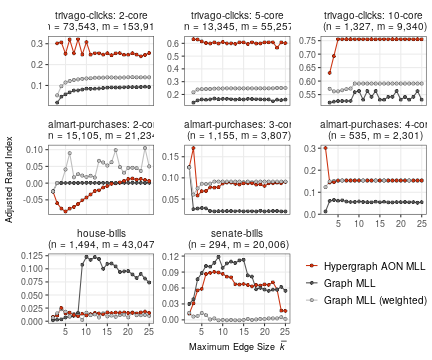

RObject{VecSxp}


In [11]:
R"""

best_df <- df %>% 
    group_by(method, kmax, core, data) %>% 
    filter(Q == max(Q)) %>% 
    filter(row_number() == 1)
    
plot_df <- df %>% 
    filter(round > 10)

best_df %>% 
    ggplot() + 
    aes(x = kmax, y = ARI) + 
    geom_line(aes(group = method, color = method)) + 
    geom_point(aes(group = method, fill = method), pch = 21, size = 1.5, stroke = .2) + 
    facet_wrap(~name, scales = "free_y") + 
    xlab(expression("Maximum Edge Size"~italic(bar(k)))) + 
    ylab(expression("Adjusted Rand Index")) + 
    theme_bw() +
    theme(strip.background = element_blank(),
          panel.spacing = unit(3, "mm"),
          strip.text = element_text(size = 10),
          legend.text = element_text(size = 10),
          panel.grid.minor = element_blank(),
          legend.key.width = unit(1.0,"line"),
          legend.position = c(.84, .17),
          legend.background = element_blank(), 
          legend.key = element_rect(colour = NA, fill = NA),
          axis.title = element_text(size = 9)) + 
    scale_color_manual(name = "", 
                       values = c("#CC3311", "#555555", "#bdbdbd"),
                       labels = c("Hypergraph AON MLL", "Graph MLL", "Graph MLL (weighted)")) + 
    scale_fill_manual(name = "", 
                      values = c("#CC3311", "#555555", "#bdbdbd"),
                      labels = c("Hypergraph AON MLL", "Graph MLL", "Graph MLL (weighted)")) + 
    scale_x_continuous(breaks = seq(0, 25, by = 5)) 
"""

In [12]:
R"""
ggsave("fig/recovery_experiments.png", width = 8, height = 6)
"""

RObject{NilSxp}
NULL


In [572]:
R"""
df %>% 
    filter(data == "Walmart", core == 2) 
"""

RObject{VecSxp}
# A tibble: 720 x 15
# Groups:   data, core [1]
   data   kmax     ℓ       Q     t     ARI method     n  core round thread     m
   <chr> <dbl> <dbl>   <dbl> <dbl>   <dbl> <fct>  <dbl> <dbl> <dbl>  <dbl> <dbl>
 1 Walm…    25   665 -9.99e5  24.0 4.29e-3 Polya… 15105     2    20      8 21234
 2 Walm…    25   725 -4.19e6  27.8 7.81e-4 Dyadic 15105     2    20      8 21234
 3 Walm…    25    20 -4.39e6  89.6 1.36e-2 Dyadi… 15105     2    20      8 21234
 4 Walm…    24   555 -9.96e5  31.3 1.11e-3 Polya… 15105     2    20      8 21225
 5 Walm…    24   728 -4.14e6  24.0 7.94e-4 Dyadic 15105     2    20      8 21225
 6 Walm…    24    19 -4.34e6  77.5 1.32e-2 Dyadi… 15105     2    20      8 21225
 7 Walm…    23   544 -9.89e5  19.2 9.12e-3 Polya… 15105     2    20      8 21204
 8 Walm…    23   746 -4.06e6  22.6 8.31e-4 Dyadic 15105     2    20      8 21204
 9 Walm…    23    21 -4.25e6  58.0 1.30e-2 Dyadi… 15105     2    20      8 21204
10 Walm…    22   587 -9.82e5  17.6 2.46e-3 Po

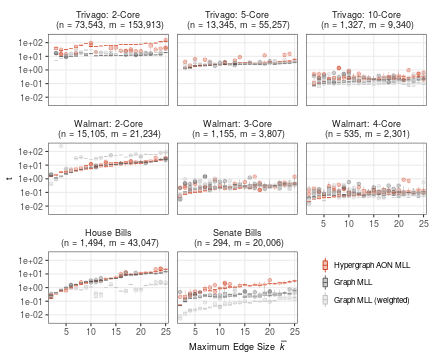

RObject{VecSxp}


┌ Warning: RCall.jl: Warning: Duplicated override.aes is ignored.
└ @ RCall /home/phil/.julia/packages/RCall/Qzssx/src/io.jl:160


In [579]:
R"""
df %>% 
    ggplot() + 
    aes(x = factor(kmax), y = t) + 
    geom_boxplot(aes(color = method, fill = method),  lwd = 0.1, outlier.alpha = 0.3, position = position_identity(), alpha = 0.3) + 
    facet_wrap(~name) + 
    xlab(expression("Maximum Edge Size"~italic(bar(k)))) + 
    theme_bw() +
    theme(strip.background = element_blank(),
          panel.spacing = unit(3, "mm"),
          strip.text = element_text(size = 9),
#          legend.position = "bottom",
          legend.text = element_text(size = 8),
          panel.grid.minor = element_blank(),
          legend.key.width = unit(0.4,"line"),
          legend.background = element_blank(), 
          legend.key = element_rect(colour = NA, fill = NA),
          axis.title = element_text(size = 9),
          legend.position = c(.84, .17)) + 
    scale_color_manual(name = "", 
                       values = c("#CC3311", "#555555", "#bdbdbd"),
                       labels = c("Hypergraph AON MLL", "Graph MLL", "Graph MLL (weighted)")) + 
    scale_fill_manual(name = "", 
                      values = c("#CC3311", "#555555", "#bdbdbd"),
                      labels = c("Hypergraph AON MLL", "Graph MLL", "Graph MLL (weighted)")) + 
    scale_x_discrete(breaks = seq(0, 25, by = 5)) + 
    scale_y_continuous(trans = "log10") + 
    guides(fill = guide_legend(override.aes = list(size = 0.4)), 
           color = guide_legend(override.aes = list(size = 0.4)))
"""